# Figure 8

### Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from karabo_data import RunDirectory

In [2]:
run = RunDirectory('../data/SCS/201831/p900048/raw/r0183/')

In [3]:
df = run.get_dataframe(fields=[("*_XGM/*", "*.i[xy]Pos"), ("*_XGM/*", "*.photonFlux")])

In [4]:
xtd10_intensity = run.get_array('SA3_XTD10_XGM/XGM/DOOCS:output', 'data.intensityTD')[:, :120]
SCS_intensity = run.get_array('SCS_BLU_XGM/XGM/DOOCS:output', 'data.intensityTD')[:, :120]

In [5]:
xtd10_intensity, SCS_intensity = xr.align(xtd10_intensity, SCS_intensity, join='inner')

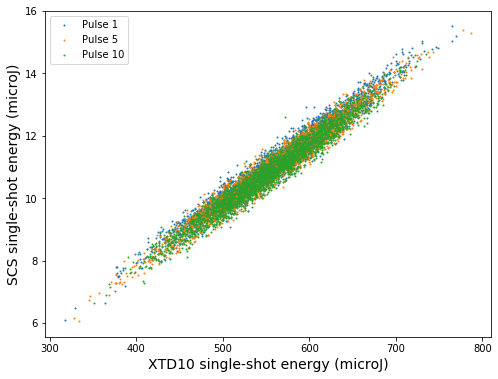

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

for pulse in [1, 5, 10]:
    ax.scatter(xtd10_intensity[:, pulse], SCS_intensity[:, pulse], label=f"Pulse {pulse}", s=1)

ax.set_xlabel('XTD10 single-shot energy (microJ)', size=14)
ax.set_ylabel('SCS single-shot energy (microJ)', size=14)

ax.legend();

In [7]:
xtd_mean = np.mean(xtd10_intensity.values)
xtd_std = np.std(xtd10_intensity.values)
xtd_percent = xtd_std/xtd_mean

print(f"XTD mean: {xtd_mean:.3f}, std {xtd_std:.3f} ({xtd_percent:.3f}%)")

XTD mean: 545.042, std 56.413 (0.104%)


In [8]:
for pulse in [1, 5, 10]:
    print(f"Pulse {pulse}:")

    x = xtd10_intensity[:, pulse].values
    y = SCS_intensity[:, pulse].values

    c_coeff = np.corrcoef(x, y)
    print(f"\tCorrelation coefficient: {c_coeff[0][1]:.3f}")
    
    l_coef = np.polyfit(x, y, deg=1)
    print(f"\tSlope: {l_coef[0]:.3f}")

    
    xtd_mean = np.mean(x); xtd_std = np.std(x)
    xtd_percent = xtd_std/xtd_mean
    print(f"\tXTD STD: {xtd_percent:.3f}")

    print("\n")

Pulse 1:
	Correlation coefficient: 0.979
	Slope: 0.020
	XTD STD: 0.109


Pulse 5:
	Correlation coefficient: 0.979
	Slope: 0.020
	XTD STD: 0.110


Pulse 10:
	Correlation coefficient: 0.977
	Slope: 0.020
	XTD STD: 0.106




Single-shot pulse energy correlation for the SASE3 beam at the XTD10 and SCS XGM. Correlation of single-shot intra-pulse-train numbers 1, 5 and 10 are shown.

The correlation coefficient for the intra-pulse number 1 is 0.98 and the scatter points stay within  7% (lower absolute measurement uncertainty). The standard deviation of the SASE fluctuation for this run is measured consistently with both XGMs to be around 11%.

The slopes are 0.02 indicating an overall beamline and gas attenuator transmission to the SCS hutch of 2% for these settings. Data sources are the single-shot XGMDh electron signals calibrated to the average ion signal, date 11 November 2018, wavelength 1.127 nm, 120 pulses per train, XTD10 XGM with Kr and SCS XGM with Xe gas target, gas attenuator was set to 5.5% transmission. The absolute measurement uncertainty  for both XGMs was 7–10%
